#Default dstilBERT model

##Testing on dtest

In [ ]:
import pandas as pd
import numpy as np

from transformers import pipeline
from tqdm import tqdm

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/dtest.csv'
dtest = pd.read_csv(file_path)

In [ ]:
testList = dtest['Comments'].to_list()

In [ ]:
def_pipe = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
data = ["I love you", ""]
def_pipe(data)                      #Returns positive result for empty string

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'POSITIVE', 'score': 0.748120903968811}]

In [ ]:
data = ["I love you", ""] # testing filtering empty strings

# Filter out empty strings
non_empty_data = [text for text in data if text.strip()]

# Apply the pipeline only to non-empty strings
if non_empty_data:
    results = def_pipe(non_empty_data)
    print(results)
else:
    print("No non-empty strings to process.")

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]


In [ ]:
data = ["I love you <3", "I love you"]
def_pipe(data)

[{'label': 'POSITIVE', 'score': 0.9998494386672974},
 {'label': 'POSITIVE', 'score': 0.9998656511306763}]

In [ ]:
#using the tqdm library to create a progress bar while iterating through each item in the testList and applying
# the def_pipe function to each item.
%%time
for item in tqdm(testList):
    def_pipe(item)

100%|██████████| 17/17 [00:00<00:00, 18.66it/s]

CPU times: user 906 ms, sys: 2.74 ms, total: 909 ms
Wall time: 918 ms


In [ ]:
#apply function (def_pipe) to each element in the 'Comments' column of the DataFrame dtest
%%time
tqdm.pandas()
dftemp = dtest['Comments'].progress_apply(lambda x: pd.Series(def_pipe([x])[0]))
dftemp

100%|██████████| 17/17 [00:00<00:00, 18.87it/s]

CPU times: user 899 ms, sys: 1.13 ms, total: 901 ms
Wall time: 908 ms


,label,score
0,POSITIVE,0.998520
1,NEGATIVE,0.997212
2,POSITIVE,0.999753
3,NEGATIVE,0.986822
4,POSITIVE,0.857597
5,NEGATIVE,0.697057
6,NEGATIVE,0.967018
7,NEGATIVE,0.966225
8,NEGATIVE,0.785466
9,NEGATIVE,0.987693


In [ ]:
dftemp.loc[dftemp['label'] == 'NEGATIVE', 'score'] *= -1 #multiplying negative labels with -1 to obtain negative value
dftemp

,label,score
0,POSITIVE,0.998520
1,NEGATIVE,-0.997212
2,POSITIVE,0.999753
3,NEGATIVE,-0.986822
4,POSITIVE,0.857597
5,NEGATIVE,-0.697057
6,NEGATIVE,-0.967018
7,NEGATIVE,-0.966225
8,NEGATIVE,-0.785466
9,NEGATIVE,-0.987693


In [ ]:
dtest[['bert_label', 'bert_score']] = dftemp
col_pref = 'bert_'
commCol = 'Comments'
dtest.filter(regex=f'{commCol}|^{col_pref}')

,Comments,bert_label,bert_score
0,That's cool 😎 he's reviewing rapper type vehic...,POSITIVE,0.998520
1,Did someone say giveaway?,NEGATIVE,-0.997212
2,Yup that alone is enough for me to make it the...,POSITIVE,0.999753
3,https://www.kickstarter.com/projects/thedeathg...,NEGATIVE,-0.986822
4,@sayeed_yafai,POSITIVE,0.857597
5,🔥🔥🔥,NEGATIVE,-0.697057
6,That car is a pass,NEGATIVE,-0.967018
7,@musicbenderofficial dude. Why play the sound ...,NEGATIVE,-0.966225
8,My friend has the very same car as you’re revi...,NEGATIVE,-0.785466
9,"We have that system in our S580, it sounds glo...",NEGATIVE,-0.987693


In [ ]:
!pip install demoji --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
dtest

,Comments,Azure_Sentiment,Azure_Score,bert_label,bert_score
0,That's cool 😎 he's reviewing rapper type vehic...,positive,85%,POSITIVE,0.998520
1,Did someone say giveaway?,positive,65%,NEGATIVE,-0.997212
2,Yup that alone is enough for me to make it the...,negative,13%,POSITIVE,0.999753
3,https://www.kickstarter.com/projects/thedeathg...,positive,67%,NEGATIVE,-0.986822
4,@sayeed_yafai,positive,66%,POSITIVE,0.857597
5,🔥🔥🔥,positive,66%,NEGATIVE,-0.697057
6,That car is a pass,neutral,56%,NEGATIVE,-0.967018
7,@musicbenderofficial dude. Why play the sound ...,negative,21%,NEGATIVE,-0.966225
8,My friend has the very same car as you’re revi...,negative,21%,NEGATIVE,-0.785466
9,"We have that system in our S580, it sounds glo...",negative,12%,NEGATIVE,-0.987693


In [ ]:
# Getting simpletext column in new dataframe dtestsimple
import pandas as pd
import demoji

# Define the prepEmoji function
def prepEmoji(text):
    contains = False
    eDict = demoji.findall(text)
    eList = demoji.findall_list(text)
    textOnly = demoji.replace(text)
    if len(eList):
        contains = True
    return contains, eDict, eList, textOnly

# Apply the prepEmoji function to create the new columns in dtest
dtest[['Emoji_List', 'Simple_Text']] = dtest['Comments'].apply(lambda x: pd.Series(prepEmoji(str(x)))[2:4])

# Create a new DataFrame dtestsimple
dtestsimple = dtest[['Simple_Text']].copy()

# Drop the 'Simple_Text' column from the original DataFrame dtest
dtest.drop(['Simple_Text'], axis=1, inplace=True)

# Now, dtestsimple contains only the 'Simple_Text' column, and dtest has it removed
dtestsimple

,Simple_Text
0,That's cool he's reviewing rapper type vehicl...
1,Did someone say giveaway?
2,Yup that alone is enough for me to make it the...
3,https://www.kickstarter.com/projects/thedeathg...
4,@sayeed_yafai
5,
6,That car is a pass
7,@musicbenderofficial dude. Why play the sound ...
8,My friend has the very same car as you’re revi...
9,"We have that system in our S580, it sounds glo..."


In [ ]:
#Remove null values from dtest
dtestsimple = dtestsimple.replace('', np.nan).dropna()
dtestsimple

,Simple_Text
0,That's cool he's reviewing rapper type vehicl...
1,Did someone say giveaway?
2,Yup that alone is enough for me to make it the...
3,https://www.kickstarter.com/projects/thedeathg...
4,@sayeed_yafai
6,That car is a pass
7,@musicbenderofficial dude. Why play the sound ...
8,My friend has the very same car as you’re revi...
9,"We have that system in our S580, it sounds glo..."
10,Amazing


In [ ]:
# Apply BERT on 'Simple_Text' column to get simpleBERT
%%time
tqdm.pandas()

def apply_bert(x):
    if pd.notna(x):  # Check if the value is not NaN
        result = def_pipe([x])[0]
        return pd.Series(result)
    else:
        return pd.Series([np.nan, np.nan])

dftemp = dtestsimple['Simple_Text'].progress_apply(apply_bert)
dftemp.loc[dftemp['label'] == 'NEGATIVE', 'score'] *= -1
dtest[['simple_bert_label', 'simple_bert_score']] = dftemp
dftemp

100%|██████████| 16/16 [00:01<00:00, 14.40it/s]

CPU times: user 1.01 s, sys: 3.4 ms, total: 1.02 s
Wall time: 1.12 s


,label,score
0,POSITIVE,0.999652
1,NEGATIVE,-0.997212
2,POSITIVE,0.999753
3,NEGATIVE,-0.986822
4,POSITIVE,0.857597
6,NEGATIVE,-0.967018
7,NEGATIVE,-0.966225
8,POSITIVE,0.945763
9,NEGATIVE,-0.987693
10,POSITIVE,0.999876


In [ ]:
dtest[['Comments','bert_label', 'bert_score', 'simple_bert_label', 'simple_bert_score']]

,Comments,bert_label,bert_score,simple_bert_label,simple_bert_score
0,That's cool 😎 he's reviewing rapper type vehic...,POSITIVE,0.998520,POSITIVE,0.999652
1,Did someone say giveaway?,NEGATIVE,-0.997212,NEGATIVE,-0.997212
2,Yup that alone is enough for me to make it the...,POSITIVE,0.999753,POSITIVE,0.999753
3,https://www.kickstarter.com/projects/thedeathg...,NEGATIVE,-0.986822,NEGATIVE,-0.986822
4,@sayeed_yafai,POSITIVE,0.857597,POSITIVE,0.857597
5,🔥🔥🔥,NEGATIVE,-0.697057,NaN,NaN
6,That car is a pass,NEGATIVE,-0.967018,NEGATIVE,-0.967018
7,@musicbenderofficial dude. Why play the sound ...,NEGATIVE,-0.966225,NEGATIVE,-0.966225
8,My friend has the very same car as you’re revi...,NEGATIVE,-0.785466,POSITIVE,0.945763
9,"We have that system in our S580, it sounds glo...",NEGATIVE,-0.987693,NEGATIVE,-0.987693


##Cleaning dataset and creating with emoji/ without emoji

In [ ]:
import re
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENTALYZE.csv'
dcomment = pd.read_csv(file_path)
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Vader_Sent_Compound,Vader_Score_WithEmoji
0,https://www.kickstarter.com/projects/thedeathg...,mkbhd,https://www.kickstarter.com/projects/thedeathg...,0,NaN,0.0000,0.000000
1,@myliferealquick 😬,mkbhd,@myliferealquick,1,,0.0000,0.194000
2,@sayeed_yafai,mkbhd,@sayeed_yafai,0,NaN,0.0000,0.000000
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,0.0000,0.000000
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,0.4215,1.800189
...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,NaN,26,NaN,0.0000,2.262000
9997,@techsmartt Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka k...,techunicorn,"@techsmartt Hi !! I LOVE youu aku suka kamu ,...",7,"@techsmartt hi !! i love youu aku suka kamu ,...",0.6988,7.855000
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,-0.2263,-0.899799
9999,*i,techunicorn,*i,0,*i,0.0000,0.000000


In [ ]:
#Get influencers brands list
brands = list(pd.unique(dcomment['Brand']))
brands

['mkbhd',
 'ijustine',
 'linustech',
 'karlconrad',
 'unboxtherapy',
 'austinnotduncan',
 'kaimanwong',
 'techsmartt',
 'supersaf',
 'techunicorn']

In [ ]:
#import re

#brands = ['mkbhd', 'brand2', 'brand3']  # Add your brand names to this list

# Remove usernames starting with '@' and everything after until a space, excluding specified brands
#pattern = re.compile(r"@(\w+(?:\.\w+)?)\s*", flags=re.IGNORECASE)

#def exclude_brands(match):
#    username = match.group(1).lower()
#    if username in brands:
#        return match.group(0)  # Keep the original match (exclude)
#    else:
#        return ''  # Remove the username

#dcomment['Comment'] = dcomment['Comment'].apply(lambda x: pattern.sub(exclude_brands, str(x)))
#dcomment['Simple_Text'] = dcomment['Simple_Text'].apply(lambda x: pattern.sub(exclude_brands, str(x)))

# Remove URLs starting with 'http' and everything after until a space
#dcomment['Comment'] = dcomment['Comment'].str.replace(r"http\S*\s*", '', regex=True)
#dcomment['Simple_Text'] = dcomment['Simple_Text'].str.replace(r"http\S*\s*", '', regex=True)

#dcomment

In [ ]:
#removing null values rows in comment
#import numpy as np

# Replace empty strings with NaN
#dcomment['Comment'] = dcomment['Comment'].replace('', np.nan)

# Drop rows with NaN in the 'Comment' column
#dcomment = dcomment.dropna(subset=['Comment'])

#dcomment

In [ ]:
#removing rows with nans from simple text
#import numpy as np

# Replace 'nan' with actual NaN values
#dcomment['Simple_Text'] = dcomment['Simple_Text'].replace('nan', np.nan)

# Drop rows with NaN in the 'Simple_Text' column
#dcomment = dcomment.dropna(subset=['Simple_Text'])
#dcomment

In [ ]:
#Only keep rows with emojis in comments column for direct comparison
#import numpy as np

# Replace 'nan' with actual NaN values
#dcomment['Simple_Text'] = dcomment['Simple_Text'].replace('nan', np.nan)

# Check if 'Comment' contains emojis
#has_emojis_mask = dcomment['Comment'].str.contains(r'[^\w\s]', regex=True)

# Keep only rows with emojis
#dcomment_with_emojis = dcomment[has_emojis_mask]

# Print the DataFrame shape before and after
#print("Before:", dcomment.shape)
#print("After (with emojis only):", dcomment_with_emojis.shape)



Before: (8571, 7)
After (with emojis only): (6221, 7)


In [ ]:
#dcomment.to_csv('/content/drive/MyDrive/Colab Notebooks/BERT and roBERTa/cleaned_dataset.csv')

## Applying on comments

###Applying on comments with Emojis

In [ ]:
from tqdm.notebook import tqdm
def_pipe = pipeline("sentiment-analysis")

NameError: name 'pipeline' is not defined

In [ ]:
# Convert comments to string but skip empty values
commentList = dcomment['Comment'].apply(lambda x: str(x) if x.strip() else None).astype(str)
commentList.head(10)

0                                                 None
1                                                    😬
2                                                 None
3                               Kool soundtrack there.
4    @mkbhd You also added stereo to the reel. nice...
5    his hairline has receded tho…not balding but h...
6                                                  🔥🔥🔥
7                                              I agree
8                                              Wowww 🔥
9                                   That car is a pass
Name: Comment, dtype: object

In [ ]:
import pandas as pd #testing on small part of dcomments
import numpy as np

# Assuming dcomment is your DataFrame

# Create a small subset (e.g., a random sample of 5 rows)
subset_dcomment = dcomment.sample(n=5, random_state=42)

# Define the sentiment analysis function
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "":
        return np.nan  # or any other value you want for skipped cells
    else:
        return def_pipe([text])[0]  # assuming def_pipe returns a list with one element

# Apply sentiment analysis to the 'Comment' column in the subset
subset_dcomment['Sentiment_Score'] = subset_dcomment['Comment'].apply(apply_sentiment_analysis)

# Display the subset with sentiment scores
print(subset_dcomment[['Comment', 'Sentiment_Score']])


                               Comment  \
6252                               🔥🔥🔥   
4684                                     
1731                                     
4742  Why does this looks so unreal 🤔🤔   
4521                         ❤️❤️❤️❤️😢   

                                        Sentiment_Score  
6252  {'label': 'NEGATIVE', 'score': 0.6970565319061...  
4684                                                NaN  
1731                                                NaN  
4742  {'label': 'NEGATIVE', 'score': 0.9996339082717...  
4521  {'label': 'NEGATIVE', 'score': 0.6970565319061...  


In [ ]:
%%time
import numpy as np

#Applying sentiment analysis
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "":
        return "N/A"  # or any other value you want for skipped cells
    else:
        return def_pipe([text])[0]  # assuming def_pipe returns a list with one element

# Apply sentiment analysis to the 'Comment' column
dcomment['Sentiment_Score'] = dcomment['Comment'].apply(apply_sentiment_analysis)

CPU times: user 7min 41s, sys: 721 ms, total: 7min 42s
Wall time: 7min 46s


In [ ]:
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,emoji_bert_label,emoji_bert_score,Sentiment_Score,Bert_Label,Bert_Score
0,,mkbhd,,0,NaN,NEGATIVE,-0.985346,N/A,NaN,NaN
1,😬,mkbhd,,1,,NEGATIVE,-0.697057,"{'label': 'NEGATIVE', 'score': 0.6970565319061...",NEGATIVE,-0.697057
2,,mkbhd,,0,NaN,NEGATIVE,-0.985346,N/A,NaN,NaN
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,"{'label': 'POSITIVE', 'score': 0.9970335960388...",POSITIVE,0.997034
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,"{'label': 'POSITIVE', 'score': 0.9981681108474...",POSITIVE,0.998168
...,...,...,...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057,"{'label': 'NEGATIVE', 'score': 0.6970565319061...",NEGATIVE,-0.697057
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805,"{'label': 'POSITIVE', 'score': 0.9988054037094...",POSITIVE,0.998805
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196,"{'label': 'NEGATIVE', 'score': 0.997195839881897}",NEGATIVE,-0.997196
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794,"{'label': 'POSITIVE', 'score': 0.9867936968803...",POSITIVE,0.986794


In [ ]:
# Assuming your DataFrame is named df
dcomment[['Bert_Label', 'Bert_Score']] = dcomment['Sentiment_Score'].apply(lambda x: pd.Series([x['label'], x['score']]) if isinstance(x, dict) else pd.Series([np.nan, np.nan]))

# Display the DataFrame with the new columns
dcomment[['Comment', 'Bert_Label', 'Bert_Score']]


,Comment,Bert_Label,Bert_Score
0,,NaN,NaN
1,😬,NEGATIVE,0.697057
2,,NaN,NaN
3,Kool soundtrack there.,POSITIVE,0.997034
4,@mkbhd You also added stereo to the reel. nice...,POSITIVE,0.998168
...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,NEGATIVE,0.697057
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",POSITIVE,0.998805
9998,To broke but would get if u had money,NEGATIVE,0.997196
9999,*i,POSITIVE,0.986794


In [ ]:
#multiply bert_score with negative
dcomment.loc[dcomment['Bert_Label'] == 'NEGATIVE', 'Bert_Score'] *= -1 #multiplying negative labels with -1 to obtain negative value
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,emoji_bert_label,emoji_bert_score,Sentiment_Score,Bert_Label,Bert_Score
0,,mkbhd,,0,NaN,NEGATIVE,-0.985346,N/A,NaN,NaN
1,😬,mkbhd,,1,,NEGATIVE,-0.697057,"{'label': 'NEGATIVE', 'score': 0.6970565319061...",NEGATIVE,-0.697057
2,,mkbhd,,0,NaN,NEGATIVE,-0.985346,N/A,NaN,NaN
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,"{'label': 'POSITIVE', 'score': 0.9970335960388...",POSITIVE,0.997034
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,"{'label': 'POSITIVE', 'score': 0.9981681108474...",POSITIVE,0.998168
...,...,...,...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057,"{'label': 'NEGATIVE', 'score': 0.6970565319061...",NEGATIVE,-0.697057
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805,"{'label': 'POSITIVE', 'score': 0.9988054037094...",POSITIVE,0.998805
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196,"{'label': 'NEGATIVE', 'score': 0.997195839881897}",NEGATIVE,-0.997196
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794,"{'label': 'POSITIVE', 'score': 0.9867936968803...",POSITIVE,0.986794


In [ ]:
dcomment.drop(['Sentiment_Score'], axis=1, inplace=True)
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score
0,,mkbhd,,0,NaN,NaN,NaN
1,😬,mkbhd,,1,,NEGATIVE,-0.697057
2,,mkbhd,,0,NaN,NaN,NaN
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168
...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794


In [ ]:
dcomment.to_csv('/content/drive/MyDrive/Colab Notebooks/BERT and roBERTa/BERT EMOJI FINAL NA.csv')

###Applying on comments without emojis

In [ ]:
# Convert comments to string but skip empty values
commentList_simple = dcomment['Simple_Text'].apply(lambda x: str(x) if x.strip() else None).astype(str)
commentList_simple.head(10)

0                                                 None
1                                                 None
2                                                 None
3                               Kool soundtrack there.
4    @mkbhd You also added stereo to the reel. nice...
5    his hairline has receded tho…not balding but h...
6                                                  nan
7                                              I agree
8                                               Wowww 
9                                   That car is a pass
Name: Simple_Text, dtype: object

In [ ]:
import pandas as pd
import numpy as np

# Assuming dcomment is your DataFrame

# Create a small subset (e.g., a random sample of 5 rows)
subset_dcomment = dcomment.sample(n=5, random_state=42)

# Define the sentiment analysis function
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "" or str(text).lower() == "nan":
        return np.nan  # or any other value you want for skipped cells
    else:
        return def_pipe([text])[0]  # assuming def_pipe returns a list with one element


# Apply sentiment analysis to the 'Comment' column in the subset
subset_dcomment['BERT_Simple_Sentiment_Score'] = subset_dcomment['Simple_Text'].apply(apply_sentiment_analysis)

# Display the subset with sentiment scores
subset_dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,BERT_Simple_Sentiment_Score
6252,🔥🔥🔥,kaimanwong,nan,3,NaN,NEGATIVE,-0.697057,NaN
4684,,unboxtherapy,,0,@unboxtherapy,NaN,NaN,NaN
1731,,ijustine,,0,NaN,NaN,NaN,NaN
4742,Why does this looks so unreal 🤔🤔,unboxtherapy,Why does this looks so unreal,2,why does this looks so unreal,NEGATIVE,-0.999634,"{'label': 'NEGATIVE', 'score': 0.9997003078460..."
4521,❤️❤️❤️❤️😢,unboxtherapy,nan,5,NaN,NEGATIVE,-0.697057,NaN


In [ ]:
%%time
import numpy as np

#Applying sentiment analysis
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "" or str(text).lower() == "nan":
        return "N/A"  # or any other value you want for skipped cells
    else:
        return def_pipe([text])[0]  # assuming def_pipe returns a list with one element

# Apply sentiment analysis to the 'Comment' column
dcomment['BERT_Simple_Sentiment_Score'] = dcomment['Simple_Text'].apply(apply_sentiment_analysis)

CPU times: user 7min 9s, sys: 666 ms, total: 7min 10s
Wall time: 7min 14s


In [ ]:
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,BERT_Simple_Sentiment_Score
0,,mkbhd,,0,NaN,NaN,NaN,N/A
1,😬,mkbhd,,1,,NEGATIVE,-0.697057,N/A
2,,mkbhd,,0,NaN,NaN,NaN,N/A
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,"{'label': 'POSITIVE', 'score': 0.9970335960388..."
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,"{'label': 'POSITIVE', 'score': 0.9981681108474..."
...,...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057,N/A
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805,"{'label': 'POSITIVE', 'score': 0.9990053772926..."
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196,"{'label': 'NEGATIVE', 'score': 0.997195839881897}"
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794,"{'label': 'POSITIVE', 'score': 0.9867936968803..."


In [ ]:
# Assuming your DataFrame is named df
dcomment[['Simple_Bert_Label', 'Simple_Bert_Score']] = dcomment['BERT_Simple_Sentiment_Score'].apply(lambda x: pd.Series([x['label'], x['score']]) if isinstance(x, dict) else pd.Series([np.nan, np.nan]))

# Display the DataFrame with the new columns
dcomment[['Simple_Text', 'Simple_Bert_Label', 'Simple_Bert_Score']]

,Simple_Text,Simple_Bert_Label,Simple_Bert_Score
0,,NaN,NaN
1,,NaN,NaN
2,,NaN,NaN
3,Kool soundtrack there.,POSITIVE,0.997034
4,@mkbhd You also added stereo to the reel. nice...,POSITIVE,0.998168
...,...,...,...
9996,nan,NaN,NaN
9997,"Hi !! I LOVE youu aku suka kamu , ndut gendut",POSITIVE,0.999005
9998,To broke but would get if u had money,NEGATIVE,0.997196
9999,*i,POSITIVE,0.986794


In [ ]:
dcomment.loc[dcomment['Simple_Bert_Label'] == 'NEGATIVE', 'Simple_Bert_Score'] *= -1 #multiplying negative labels with -1 to obtain negative value
dcomment[['Simple_Text', 'Simple_Bert_Label', 'Simple_Bert_Score']]

,Simple_Text,Simple_Bert_Label,Simple_Bert_Score
0,,NaN,NaN
1,,NaN,NaN
2,,NaN,NaN
3,Kool soundtrack there.,POSITIVE,0.997034
4,@mkbhd You also added stereo to the reel. nice...,POSITIVE,0.998168
...,...,...,...
9996,nan,NaN,NaN
9997,"Hi !! I LOVE youu aku suka kamu , ndut gendut",POSITIVE,0.999005
9998,To broke but would get if u had money,NEGATIVE,-0.997196
9999,*i,POSITIVE,0.986794


In [ ]:
dcomment.drop(['BERT_Simple_Sentiment_Score'], axis=1, inplace=True)
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score
0,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN
1,😬,mkbhd,,1,,NEGATIVE,-0.697057,NaN,NaN
2,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,POSITIVE,0.997034
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,POSITIVE,0.998168
...,...,...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057,NaN,NaN
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805,POSITIVE,0.999005
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196,NEGATIVE,-0.997196
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794,POSITIVE,0.986794


In [ ]:
dcomment.to_csv("/content/drive/MyDrive/Colab Notebooks/BERT and roBERTa/BERT SIMPLE AND EMOJI.csv", index=False)

#roBERTa

##Testing on dtest

In [ ]:
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
roberta_pipe = pipeline("sentiment-analysis", model=model_path) #, top_k=None )

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly 

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
data = ["I love you", "I love you <3", ""] #testing emojis and empty strings
roberta_pipe(data)

[{'label': 'positive', 'score': 0.8594695329666138},
 {'label': 'positive', 'score': 0.9710745215415955},
 {'label': 'positive', 'score': 0.4012986123561859}]

In [ ]:
data = ["I love you", ""] #testing filtering empty strings

# Filter out empty strings
non_empty_data = [text for text in data if text.strip()]

# Apply the pipeline only to non-empty strings
if non_empty_data:
    results = def_pipe(non_empty_data)
    print(results)
else:
    print("No non-empty strings to process.")

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]


In [ ]:
testList

["That's cool 😎 he's reviewing rapper type vehicles now!",
 'Did someone say giveaway?',
 "Yup that alone is enough for me to make it the best car i can't afford",
 'https://www.kickstarter.com/projects/thedeathguru/the-death-guru',
 '@sayeed_yafai',
 '🔥🔥🔥',
 'That car is a pass',
 '@musicbenderofficial dude. Why play the sound in a video when it won’t do the speakers justice? Its the whole point….',
 'My friend has the very same car as you’re reviewing & his dad’s BMW has a better sound system to be honest 🥸🤔🎸',
 'We have that system in our S580, it sounds glorious. Ours has aftermarket wheels, is lowered, and blacked out too. The car is so sick',
 '🔥🔥 Amazing',
 'Thanks @mkbhd, I was really on the fence about buying this car but now that I know the sound is real good I will now buy it after I sell everything that I own 😃😃😃😃😃😃😃😃😃😃',
 '@philip.anyengo his hairline has receded tho…not balding but hairline maturation',
 '@myliferealquick 😬',
 "That's the one ☝🏾",
 'Wow 🙏🏽🔥',
 '@mkbhd Sir

In [ ]:
#testing on testlist
%%time
roberta_pipe(testList)

CPU times: user 1.92 s, sys: 2.99 ms, total: 1.92 s
Wall time: 1.94 s


[{'label': 'positive', 'score': 0.9593971371650696},
 {'label': 'neutral', 'score': 0.8967348337173462},
 {'label': 'positive', 'score': 0.6421612501144409},
 {'label': 'neutral', 'score': 0.8110071420669556},
 {'label': 'neutral', 'score': 0.757602334022522},
 {'label': 'positive', 'score': 0.8910276889801025},
 {'label': 'negative', 'score': 0.5086482763290405},
 {'label': 'negative', 'score': 0.8225827813148499},
 {'label': 'positive', 'score': 0.8153119683265686},
 {'label': 'positive', 'score': 0.6352381110191345},
 {'label': 'positive', 'score': 0.9718629717826843},
 {'label': 'positive', 'score': 0.9040770530700684},
 {'label': 'neutral', 'score': 0.8614118695259094},
 {'label': 'neutral', 'score': 0.788112223148346},
 {'label': 'positive', 'score': 0.9400154948234558},
 {'label': 'positive', 'score': 0.9743798971176147},
 {'label': 'neutral', 'score': 0.5245425701141357}]

In [ ]:
# getting results in df
%%time
dftemp2 = dtest['Comments'].progress_apply(lambda x: pd.Series(roberta_pipe([x])[0]))
dftemp2

100%|██████████| 17/17 [00:02<00:00,  5.74it/s]

CPU times: user 2.84 s, sys: 11.9 ms, total: 2.85 s
Wall time: 2.97 s


,label,score
0,positive,0.959397
1,neutral,0.896735
2,positive,0.642161
3,neutral,0.811007
4,neutral,0.757602
5,positive,0.891028
6,negative,0.508648
7,negative,0.822583
8,positive,0.815312
9,positive,0.635238


In [ ]:
#concatenating with dataset
dtest[['rob_label', 'rob_score']] = dftemp2
col_pref2 = 'rob_'
dtest.filter(regex=f'{commCol}|^{col_pref2}|^{col_pref}')

,Comments,rob_label,rob_score
0,That's cool 😎 he's reviewing rapper type vehic...,positive,0.959397
1,Did someone say giveaway?,neutral,0.896735
2,Yup that alone is enough for me to make it the...,positive,0.642161
3,https://www.kickstarter.com/projects/thedeathg...,neutral,0.811007
4,@sayeed_yafai,neutral,0.757602
5,🔥🔥🔥,positive,0.891028
6,That car is a pass,negative,0.508648
7,@musicbenderofficial dude. Why play the sound ...,negative,0.822583
8,My friend has the very same car as you’re revi...,positive,0.815312
9,"We have that system in our S580, it sounds glo...",positive,0.635238


In [ ]:
#Applying on dtest without emojis

#testing on testlist
%%time
roberta_pipe(testList)

In [ ]:
# getting results in df
%%time
dftemp2 = dtest['Comments'].progress_apply(lambda x: pd.Series(roberta_pipe([x])[0]))
dftemp2

In [ ]:
#concatenating with dataset
dtest[['rob_label', 'rob_score']] = dftemp2
col_pref2 = 'rob_'
dtest.filter(regex=f'{commCol}|^{col_pref2}|^{col_pref}')

##Applying on comments

###Applying roBERTa to comments with emojis

In [ ]:
from tqdm.notebook import tqdm
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
roberta_pipe = pipeline("sentiment-analysis", model=model_path) #, top_k=None )

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Convert comments to string but skip empty values
commentList = dcomment['Comment'].apply(lambda x: str(x) if x.strip() else None).astype(str)
commentList.head(10)

0                                                 None
1                                                    😬
2                                                 None
3                               Kool soundtrack there.
4    @mkbhd You also added stereo to the reel. nice...
5    his hairline has receded tho…not balding but h...
6                                                  🔥🔥🔥
7                                              I agree
8                                              Wowww 🔥
9                                   That car is a pass
Name: Comment, dtype: object

In [ ]:
import pandas as pd #testing on small part of dcomments
import numpy as np

# Assuming dcomment is your DataFrame

# Create a small subset (e.g., a random sample of 5 rows)
subset_dcomment = dcomment.sample(n=5, random_state=42)

# Define the sentiment analysis function
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "":
        return np.nan  # or any other value you want for skipped cells
    else:
        return roberta_pipe([text])[0]  # assuming def_pipe returns a list with one element

# Apply sentiment analysis to the 'Comment' column in the subset
subset_dcomment['rob_Sentiment_Score'] = subset_dcomment['Comment'].apply(apply_sentiment_analysis)

# Display the subset with sentiment scores
print(subset_dcomment[['Comment', 'rob_Sentiment_Score']])


                               Comment  \
6252                               🔥🔥🔥   
4684                                     
1731                                     
4742  Why does this looks so unreal 🤔🤔   
4521                         ❤️❤️❤️❤️😢   

                                    rob_Sentiment_Score  
6252  {'label': 'positive', 'score': 0.8910276889801...  
4684                                                NaN  
1731                                                NaN  
4742  {'label': 'negative', 'score': 0.8178839683532...  
4521  {'label': 'positive', 'score': 0.7560462355613...  


In [ ]:
%%time
import numpy as np

#Applying sentiment analysis
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "":
        return "N/A"  # or any other value you want for skipped cells
    else:
        return roberta_pipe([text])[0]  # assuming def_pipe returns a list with one element

# Apply sentiment analysis to the 'Comment' column
dcomment['rob_Sentiment_Score'] = dcomment['Comment'].apply(apply_sentiment_analysis)

CPU times: user 16min 9s, sys: 570 ms, total: 16min 9s
Wall time: 16min 16s


In [ ]:
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,roBERTa_Simple_Sentiment_Score
0,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
1,😬,mkbhd,,1,,NEGATIVE,-0.697057,NaN,NaN,neutral,0.558588,NaN,NaN,N/A
2,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,POSITIVE,0.997034,neutral,0.626263,neutral,0.626263,"{'label': 'neutral', 'score': 0.6262633204460144}"
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,POSITIVE,0.998168,positive,0.882946,positive,0.882946,"{'label': 'positive', 'score': 0.8829459547996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057,NaN,NaN,positive,0.538445,NaN,NaN,N/A
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805,POSITIVE,0.999005,positive,0.987480,positive,0.981392,"{'label': 'positive', 'score': 0.9813915491104..."
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196,NEGATIVE,-0.997196,neutral,0.550326,neutral,0.550326,"{'label': 'neutral', 'score': 0.5503261685371399}"
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794,POSITIVE,0.986794,neutral,0.677068,neutral,0.677068,"{'label': 'neutral', 'score': 0.6770683526992798}"


In [ ]:
# Assuming your DataFrame is named df
dcomment[['roberta_Label', 'roberta_Score']] = dcomment['rob_Sentiment_Score'].apply(lambda x: pd.Series([x['label'], x['score']]) if isinstance(x, dict) else pd.Series([np.nan, np.nan]))

# Display the DataFrame with the new columns
dcomment[['Comment', 'roberta_Label', 'roberta_Score']]

,Comment,roberta_Label,roberta_Score
0,,NaN,NaN
1,😬,neutral,0.558588
2,,NaN,NaN
3,Kool soundtrack there.,neutral,0.626263
4,@mkbhd You also added stereo to the reel. nice...,positive,0.882946
...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,positive,0.538445
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",positive,0.987480
9998,To broke but would get if u had money,neutral,0.550326
9999,*i,neutral,0.677068


In [ ]:
#multiply roberta_score with negative
dcomment.loc[dcomment['roberta_Label'] == 'negative', 'roberta_Score'] *= -1 #multiplying negative labels with -1 to obtain negative value
row_9 = dcomment.iloc[9:12]
row_9

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,rob_Sentiment_Score
9,That car is a pass,mkbhd,That car is a pass,0,that car is a pass,NEGATIVE,-0.967018,NEGATIVE,-0.967018,negative,-0.508648,negative,-0.508648,"{'label': 'negative', 'score': 0.5086482763290..."
10,dude. Why play the sound in a video when it wo...,mkbhd,dude. Why play the sound in a video when it wo...,0,dude. why play the sound in a video when it w...,NEGATIVE,-0.975165,NEGATIVE,-0.975165,negative,-0.818103,negative,-0.818103,"{'label': 'negative', 'score': 0.8181026577949..."
11,"You know when ""Luigi boccherini: minuetto"" sta...",mkbhd,"You know when ""Luigi boccherini: minuetto"" sta...",0,"you know when ""luigi boccherini: minuetto"" sta...",NEGATIVE,-0.998337,NEGATIVE,-0.998337,neutral,0.598538,neutral,0.598538,"{'label': 'neutral', 'score': 0.5985383987426758}"


In [ ]:
dcomment.drop(['rob_Sentiment_Score'], axis=1, inplace=True)
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,roBERTa_Simple_Sentiment_Score
0,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
1,😬,mkbhd,,1,,NEGATIVE,-0.697057,NaN,NaN,neutral,0.558588,NaN,NaN,N/A
2,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,POSITIVE,0.997034,neutral,0.626263,neutral,0.626263,"{'label': 'neutral', 'score': 0.6262633204460144}"
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,POSITIVE,0.998168,positive,0.882946,positive,0.882946,"{'label': 'positive', 'score': 0.8829459547996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057,NaN,NaN,positive,0.538445,NaN,NaN,N/A
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805,POSITIVE,0.999005,positive,0.987480,positive,0.981392,"{'label': 'positive', 'score': 0.9813915491104..."
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196,NEGATIVE,-0.997196,neutral,0.550326,neutral,0.550326,"{'label': 'neutral', 'score': 0.5503261685371399}"
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794,POSITIVE,0.986794,neutral,0.677068,neutral,0.677068,"{'label': 'neutral', 'score': 0.6770683526992798}"


In [ ]:
dcomment.to_csv('/content/drive/MyDrive/Colab Notebooks/BERT and roBERTa/ BERT and roBERTa simple.csv',index= False)

###Applying roBERTa to comments without emojis

In [ ]:
# Convert comments to string but skip empty values
commentList_simple = dcomment['Simple_Text'].apply(lambda x: str(x) if x.strip() else None).astype(str)
commentList_simple.head(10)

0                                                 None
1                                                 None
2                                                 None
3                               Kool soundtrack there.
4    @mkbhd You also added stereo to the reel. nice...
5    his hairline has receded tho…not balding but h...
6                                                  nan
7                                              I agree
8                                               Wowww 
9                                   That car is a pass
Name: Simple_Text, dtype: object

In [ ]:
import pandas as pd
import numpy as np

# Assuming dcomment is your DataFrame

# Create a small subset (e.g., a random sample of 5 rows)
subset_dcomment = dcomment.sample(n=5, random_state=42)

# Define the sentiment analysis function
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "" or str(text).lower() == "nan":
        return np.nan  # or any other value you want for skipped cells
    else:
        return roberta_pipe([text])[0]  # assuming def_pipe returns a list with one element


# Apply sentiment analysis to the 'Comment' column in the subset
subset_dcomment['roBERTa_Simple_Sentiment_Score'] = subset_dcomment['Simple_Text'].apply(apply_sentiment_analysis)

# Display the subset with sentiment scores
subset_dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,rob_Sentiment_Score,roBERTa_Simple_Sentiment_Score
6252,🔥🔥🔥,kaimanwong,nan,3,NaN,NEGATIVE,-0.697057,NaN,NaN,positive,0.891028,NaN,NaN,"{'label': 'positive', 'score': 0.8910276889801...",NaN
4684,,unboxtherapy,,0,@unboxtherapy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,NaN
1731,,ijustine,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,NaN
4742,Why does this looks so unreal 🤔🤔,unboxtherapy,Why does this looks so unreal,2,why does this looks so unreal,NEGATIVE,-0.999634,NEGATIVE,-0.9997,negative,-0.817884,negative,-0.836729,"{'label': 'negative', 'score': 0.8178839683532...","{'label': 'negative', 'score': 0.8367289900779..."
4521,❤️❤️❤️❤️😢,unboxtherapy,nan,5,NaN,NEGATIVE,-0.697057,NaN,NaN,positive,0.756046,NaN,NaN,"{'label': 'positive', 'score': 0.7560462355613...",NaN


In [ ]:
%%time
import numpy as np

#Applying sentiment analysis
def apply_sentiment_analysis(text):
    if pd.isna(text) or text.strip() == "" or str(text).lower() == "nan":
        return "N/A"  # or any other value you want for skipped cells
    else:
        return roberta_pipe([text])[0]  # assuming def_pipe returns a list with one element

# Apply sentiment analysis to the 'Comment' column
dcomment['roBERTa_Simple_Sentiment_Score'] = dcomment['Simple_Text'].apply(apply_sentiment_analysis)

CPU times: user 14min, sys: 542 ms, total: 14min 1s
Wall time: 14min 7s


In [ ]:
dcomment

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,rob_Sentiment_Score,roBERTa_Simple_Sentiment_Score
0,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A
1,😬,mkbhd,,1,,NEGATIVE,-0.697057,NaN,NaN,neutral,0.558588,NaN,NaN,"{'label': 'neutral', 'score': 0.5585879683494568}",N/A
2,,mkbhd,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,POSITIVE,0.997034,neutral,0.626263,neutral,0.626263,"{'label': 'neutral', 'score': 0.6262633204460144}","{'label': 'neutral', 'score': 0.6262633204460144}"
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,POSITIVE,0.998168,positive,0.882946,positive,0.882946,"{'label': 'positive', 'score': 0.8829459547996...","{'label': 'positive', 'score': 0.8829459547996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖😖😖😖😖😖😖😖😖😖😖😖😖😖😖,techunicorn,nan,26,NaN,NEGATIVE,-0.697057,NaN,NaN,positive,0.538445,NaN,NaN,"{'label': 'positive', 'score': 0.538445234298706}",N/A
9997,"Hi !! I LOVE youu 💗💗💗🌸🍓 aku suka kamu , ndut g...",techunicorn,"Hi !! I LOVE youu aku suka kamu , ndut gendut",7,"@techsmartt hi !! i love youu aku suka kamu ,...",POSITIVE,0.998805,POSITIVE,0.999005,positive,0.987480,positive,0.981392,"{'label': 'positive', 'score': 0.9874804615974...","{'label': 'positive', 'score': 0.9813915491104..."
9998,To broke but would get if u had money,techunicorn,To broke but would get if u had money,0,to broke but would get if u had money,NEGATIVE,-0.997196,NEGATIVE,-0.997196,neutral,0.550326,neutral,0.550326,"{'label': 'neutral', 'score': 0.5503261685371399}","{'label': 'neutral', 'score': 0.5503261685371399}"
9999,*i,techunicorn,*i,0,*i,POSITIVE,0.986794,POSITIVE,0.986794,neutral,0.677068,neutral,0.677068,"{'label': 'neutral', 'score': 0.6770683526992798}","{'label': 'neutral', 'score': 0.6770683526992798}"


In [ ]:
# Assuming your DataFrame is named df
dcomment[['Simple_roBerta_Label', 'Simple_roBerta_Score']] = dcomment['roBERTa_Simple_Sentiment_Score'].apply(lambda x: pd.Series([x['label'], x['score']]) if isinstance(x, dict) else pd.Series([np.nan, np.nan]))

# Display the DataFrame with the new columns
dcomment[['Simple_Text', 'Simple_roBerta_Label', 'Simple_roBerta_Score']]

,Simple_Text,Simple_roBerta_Label,Simple_roBerta_Score
0,,NaN,NaN
1,,NaN,NaN
2,,NaN,NaN
3,Kool soundtrack there.,neutral,0.626263
4,@mkbhd You also added stereo to the reel. nice...,positive,0.882946
...,...,...,...
9996,nan,NaN,NaN
9997,"Hi !! I LOVE youu aku suka kamu , ndut gendut",positive,0.981392
9998,To broke but would get if u had money,neutral,0.550326
9999,*i,neutral,0.677068


In [ ]:
dcomment.loc[dcomment['Simple_roBerta_Label'] == 'negative', 'Simple_roBerta_Score'] *= -1 #multiplying negative labels with -1 to obtain negative value
dcomment[['Simple_Text', 'Simple_roBerta_Label', 'Simple_roBerta_Score']]


,Simple_Text,Simple_roBerta_Label,Simple_roBerta_Score
0,,NaN,NaN
1,,NaN,NaN
2,,NaN,NaN
3,Kool soundtrack there.,neutral,0.626263
4,@mkbhd You also added stereo to the reel. nice...,positive,0.882946
...,...,...,...
9996,nan,NaN,NaN
9997,"Hi !! I LOVE youu aku suka kamu , ndut gendut",positive,0.981392
9998,To broke but would get if u had money,neutral,0.550326
9999,*i,neutral,0.677068


In [ ]:
dcomment.drop(['roBERTa_Simple_Sentiment_Score'], axis=1, inplace=True)


In [ ]:
dcomment.iloc[6:10]

,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score
6,🔥🔥🔥,mkbhd,nan,3,NaN,NEGATIVE,-0.697057,NaN,NaN,positive,0.891028,NaN,NaN
7,I agree,mkbhd,I agree,0,i agree,POSITIVE,0.999813,POSITIVE,0.999813,neutral,0.595007,neutral,0.595007
8,Wowww 🔥,mkbhd,Wowww,1,wowww,POSITIVE,0.985905,POSITIVE,0.997270,positive,0.961197,positive,0.602939
9,That car is a pass,mkbhd,That car is a pass,0,that car is a pass,NEGATIVE,-0.967018,NEGATIVE,-0.967018,negative,-0.508648,negative,-0.508648


In [ ]:
dcomment.to_csv("/content/drive/MyDrive/Colab Notebooks/BERT and roBERTa/BERT AND roBERTA FINAL.csv")

# Processing VADER scores

##Normalizing VADER scores

In [ ]:
import pandas as pd

sentscores_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dfccom_totSentScores.csv')

In [ ]:
sentscores_df.head(8)

,Comment,Brand,Simple_Text,Emoji_Count,Emoji_Score_List,Prep_Text,sent_pos,sent_neg,sent_neu,sent_compound,denorm_comp,Score_WithEmoji
0,https://www.kickstarter.com/projects/thedeathg...,mkbhd,https://www.kickstarter.com/projects/thedeathg...,0.0,NaN,NaN,0.000,0.0,0.000,0.0000,0.000000,0.000000
1,@myliferealquick 😬,mkbhd,@myliferealquick,1.0,[0.194],,0.000,0.0,0.000,0.0000,0.000000,0.194000
2,@sayeed_yafai,mkbhd,@sayeed_yafai,0.0,NaN,NaN,0.000,0.0,0.000,0.0000,0.000000,0.000000
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0.0,NaN,kool soundtrack there.,0.000,0.0,1.000,0.0000,0.000000,0.000000
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0.0,NaN,@mkbhd you also added stereo to the reel. nice...,0.219,0.0,0.781,0.4215,1.800189,1.800189
5,@philip.anyengo his hairline has receded tho…n...,mkbhd,@philip.anyengo his hairline has receded tho…n...,0.0,NaN,his hairline has receded tho…not balding but ...,0.000,0.0,1.000,0.0000,0.000000,0.000000
6,🔥🔥🔥,mkbhd,NaN,3.0,"[0.139, 0.139, 0.139]",NaN,0.000,0.0,1.000,0.0000,0.000000,0.417000
7,@philip.anyengo I agree,mkbhd,@philip.anyengo I agree,0.0,NaN,i agree,0.714,0.0,0.286,0.3612,1.500203,1.500203


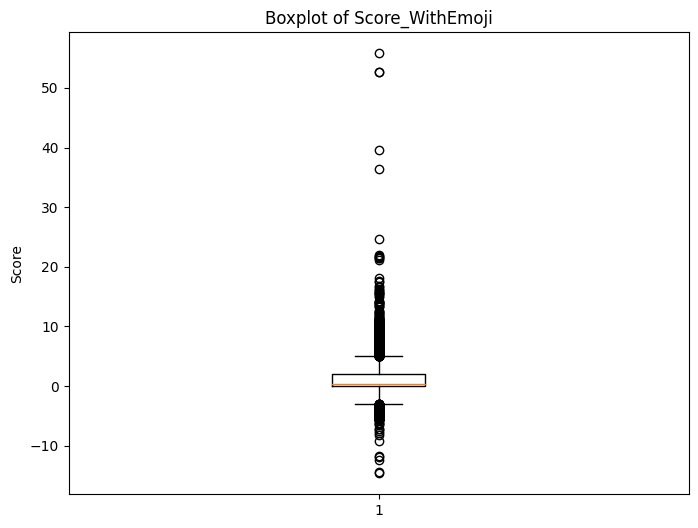

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot of the Score_WithEmoji column
plt.figure(figsize=(8, 6))
plt.boxplot(sentscores_df['Score_WithEmoji'])
plt.title('Boxplot of Score_WithEmoji')
plt.ylabel('Score')
plt.show()

In [ ]:
# Find the maximum and minimum values in the Scores_With_Emoji column
max_score_with_emoji = sentscores_df['Score_WithEmoji'].max()
min_score_with_emoji = sentscores_df['Score_WithEmoji'].min()

# Find the maximum and minimum values in the sent_compound column
max_sent_compound = sentscores_df['sent_compound'].max()
min_sent_compound = sentscores_df['sent_compound'].min()

print("Maximum value in Score_WithEmoji:", max_score_with_emoji)
print("Minimum value in Score_WithEmoji:", min_score_with_emoji)
print("Maximum value in sent_compound:", max_sent_compound)
print("Minimum value in sent_compound:", min_sent_compound)

Maximum value in Score_WithEmoji: 55.80102602467557
Minimum value in Score_WithEmoji: -14.607004717025545
Maximum value in sent_compound: 0.9976
Minimum value in sent_compound: -0.9666


In [ ]:
# Copy the DataFrame to avoid modifying the original DataFrame
normalized_df = sentscores_df.copy()

# Define custom normalization function
def custom_normalize(value):
    if value == 0:
        return 0  # No change for 0 values
    elif value > 0:
        return value / sentscores_df['Score_WithEmoji'].abs().max()  # Scale positive values between 0 and 1
    else:
        return value / abs(sentscores_df['Score_WithEmoji'].min())  # Scale negative values between -1 and 0

# Apply custom normalization function to Score_WithEmoji column
normalized_df['Score_WithEmoji'] = sentscores_df['Score_WithEmoji'].apply(custom_normalize)

# Print the first few rows to verify the changes
normalized_df.head()


,Comment,Brand,Simple_Text,Emoji_Count,Emoji_Score_List,Prep_Text,sent_pos,sent_neg,sent_neu,sent_compound,denorm_comp,Score_WithEmoji
0,https://www.kickstarter.com/projects/thedeathg...,mkbhd,https://www.kickstarter.com/projects/thedeathg...,0.0,NaN,NaN,0.000,0.0,0.000,0.0000,0.000000,0.000000
1,@myliferealquick 😬,mkbhd,@myliferealquick,1.0,[0.194],,0.000,0.0,0.000,0.0000,0.000000,0.003477
2,@sayeed_yafai,mkbhd,@sayeed_yafai,0.0,NaN,NaN,0.000,0.0,0.000,0.0000,0.000000,0.000000
3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0.0,NaN,kool soundtrack there.,0.000,0.0,1.000,0.0000,0.000000,0.000000
4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0.0,NaN,@mkbhd you also added stereo to the reel. nice...,0.219,0.0,0.781,0.4215,1.800189,0.032261


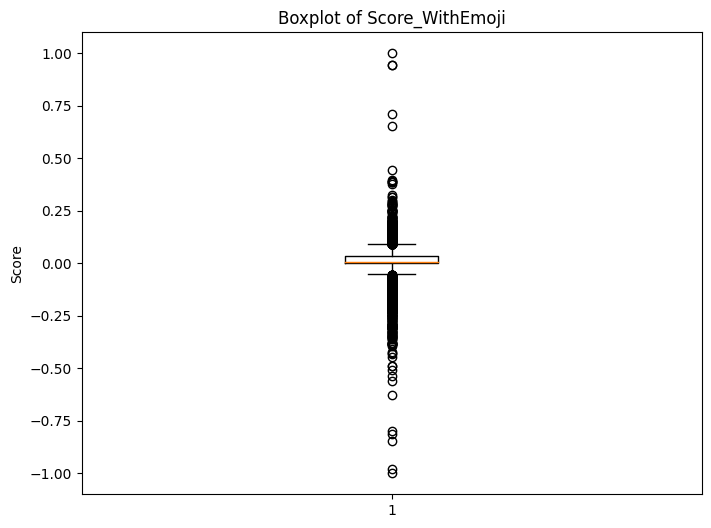

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot of the Score_WithEmoji column
plt.figure(figsize=(8, 6))
plt.boxplot(normalized_df['Score_WithEmoji'])
plt.title('Boxplot of Score_WithEmoji')
plt.ylabel('Score')
plt.show()


##Cocenating with BERT and roBERTa results

In [ ]:
import pandas as pd

bert_and_roberta_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BERT and roBERTa/BERT AND roBERTA FINAL.csv')

# Copy columns from tot_sent_scores_df to bert_and_roberta_df
bert_and_roberta_df['VADER_compound'] = normalized_df['sent_compound']
bert_and_roberta_df['VADER_Score_emoji'] = normalized_df['Score_WithEmoji']

# Save the merged DataFrame to a new CSV file
bert_and_roberta_df.to_csv('/content/drive/MyDrive/Colab Notebooks/VADER BERT roBERTa/VADER_BERT_roBERTA.csv', index=False)

In [ ]:
bert_and_roberta_df.head()

,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji
0,0,NaN,mkbhd,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.000000
1,1,😬,mkbhd,NaN,1,,NEGATIVE,-0.697057,NaN,NaN,neutral,0.558588,NaN,NaN,0.0000,0.003477
2,2,NaN,mkbhd,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.000000
3,3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,POSITIVE,0.997034,neutral,0.626263,neutral,0.626263,0.0000,0.000000
4,4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,POSITIVE,0.998168,positive,0.882946,positive,0.882946,0.4215,0.032261


#Questionnaire

## Making questionnaire

Make a questionnaire of 1000 comments using stratified sampling to evaluate the results of the models.

The factors of consideration are:


*   Equal representation of influencers
*   Equal representation of polarity (Pos, Neu, Neg)
*   Comments where the models have differenciating results
*   Comments containing emojis








In [ ]:
#importing packages
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/VADER BERT roBERTa/VADER_BERT_roBERTA.csv")
df.head(5)

,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji
0,0,NaN,mkbhd,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.000000
1,1,😬,mkbhd,NaN,1,,NEGATIVE,-0.697057,NaN,NaN,neutral,0.558588,NaN,NaN,0.0000,0.003477
2,2,NaN,mkbhd,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.000000
3,3,Kool soundtrack there.,mkbhd,Kool soundtrack there.,0,kool soundtrack there.,POSITIVE,0.997034,POSITIVE,0.997034,neutral,0.626263,neutral,0.626263,0.0000,0.000000
4,4,@mkbhd You also added stereo to the reel. nice...,mkbhd,@mkbhd You also added stereo to the reel. nice...,0,@mkbhd you also added stereo to the reel. nice...,POSITIVE,0.998168,POSITIVE,0.998168,positive,0.882946,positive,0.882946,0.4215,0.032261


In [ ]:
# Count the number of duplicate values in the 'Comment' column
num_duplicates = df.duplicated(subset=['Comment']).sum()

# Display the number of duplicate values
print("Number of duplicate values in the 'Comment' column:", num_duplicates)


Number of duplicate values in the 'Comment' column: 1656


In [ ]:
# Convert the 'Comment' column to lowercase and remove leading/trailing whitespaces
df['Comment'] = df['Comment'].str.lower().str.strip()

# Remove rows containing duplicate values in the 'Comment' column
df= df.drop_duplicates(subset=['Comment'])

# Identify the rows with additional duplicates
#additional_duplicates = df[df.duplicated(subset=['Comment'], keep=False) & ~df.index.isin(df_no_duplicates.index)]

# Remove the additional duplicates
#df= pd.concat([df, additional_duplicates]).drop_duplicates(keep=False)

# Display the number of duplicate values
#num_duplicates = df.duplicated(subset=['Comment']).sum()
#print("Number of duplicate values in the 'Comment' column after removal:", num_duplicates)


In [ ]:
# Check the frequency of each brand in the 'Brand' column of sampled_df
brand_counts = df['Brand'].value_counts()

# Display the frequency of each brand
brand_counts

kaimanwong         934
linustech          920
austinnotduncan    897
ijustine           870
techsmartt         834
supersaf           831
techunicorn        821
mkbhd              800
unboxtherapy       741
karlconrad         616
Name: Brand, dtype: int64

In [ ]:
num_duplicates = df.duplicated(subset=['Comment']).sum()
print("Number of duplicate values in the 'Comment' column after removal:", num_duplicates)

Number of duplicate values in the 'Comment' column after removal: 0


In [ ]:
import pandas as pd

# Load the dataframe
# df = pd.read_csv('your_dataframe.csv')

# Drop rows with missing values in specified columns
df = df.dropna(subset=['Comment', 'Brand', 'Bert_Label', 'roberta_Label', 'Simple_Bert_Label', 'Simple_roBerta_Label', 'VADER_Score_emoji'])

# Ensure no duplicates in the 'Comment' column
df = df.drop_duplicates(subset=['Comment'])

# Separate comments with emojis
df_emoji = df[df['Comment'].str.contains('[\U0001F300-\U0001F6FF]', regex=True)]

# Sample comments with emojis
sampled_emoji = df_emoji.sample(n=min(1000, len(df_emoji)), random_state=42)

# Remove sampled comments with emojis from the original dataframe
df = df.drop(sampled_emoji.index)

# Calculate the number of samples needed for each condition
remaining_samples = 1000 - len(sampled_emoji)
num_unique_comments_needed = remaining_samples

# Sample unique comments without considering equal distribution in 'Brand' column
sampled_df = df.sample(n=num_unique_comments_needed, random_state=42)

# Check if enough unique comments are sampled, if not, relax the condition for 'Brand' column
if len(sampled_df) < num_unique_comments_needed:
    num_unique_comments_needed -= len(sampled_df)
    remaining_df = df[~df['Comment'].isin(sampled_df['Comment'])]
    sampled_df = pd.concat([sampled_df, remaining_df.sample(n=num_unique_comments_needed, random_state=42)])

# Check if enough unique comments are sampled, if not, relax the condition for 'Bert_Label' and 'roberta_Label' columns
if len(sampled_df) < num_unique_comments_needed:
    num_unique_comments_needed -= len(sampled_df)
    remaining_df = df[~df['Comment'].isin(sampled_df['Comment'])]
    sampled_df = pd.concat([sampled_df, remaining_df.sample(n=num_unique_comments_needed, random_state=42)])

# Check if enough unique comments are sampled, if not, relax the condition for 'VADER_Score_emoji' column
if len(sampled_df) < num_unique_comments_needed:
    num_unique_comments_needed -= len(sampled_df)
    remaining_df = df[~df['Comment'].isin(sampled_df['Comment'])]
    sampled_df = pd.concat([sampled_df, remaining_df.sample(n=num_unique_comments_needed, random_state=42)])

# Concatenate sampled comments with emojis and the remaining sampled comments
sampled_df = pd.concat([sampled_emoji, sampled_df])

# Shuffle the sampled DataFrame
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Take the first 1000 rows
sampled_df = sampled_df.head(1000)

# Check dataframe
sampled_df


,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji
8051,8051,1st time i saw the micro kitchens at google i ...,supersaf,1st time I saw the micro kitchens at Google I ...,1,1st time i saw the micro kitchens at google i ...,POSITIVE,0.961048,POSITIVE,0.984888,positive,0.805898,positive,0.668046,0.5719,2.965
6681,6681,nice👍🏻,kaimanwong,Nice,1,nice,NEGATIVE,-0.697057,POSITIVE,0.999855,positive,0.967097,positive,0.774059,0.4215,2.321
2761,2761,do a liquid nitrogen build😏,linustech,do a liquid nitrogen build,1,do a liquid nitrogen build,NEGATIVE,-0.734524,POSITIVE,0.955170,neutral,0.808060,neutral,0.762930,0.0000,0.332
1932,1932,wow😮❤️,ijustine,Wow,2,wow,NEGATIVE,-0.697057,POSITIVE,0.999592,positive,0.970919,positive,0.699231,0.5859,3.725
4899,4899,now that looks next level 😮‍💨😮‍💨😮‍💨😮‍💨,unboxtherapy,now that looks next level,4,now that looks next level,POSITIVE,0.941367,POSITIVE,0.995301,positive,0.627366,positive,0.924257,0.0000,1.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391,4391,😂 close enough,unboxtherapy,close enough,1,close enough,POSITIVE,0.995269,POSITIVE,0.998599,neutral,0.545299,neutral,0.579887,0.0000,0.221
9752,9752,🔥🔥🔥🔥🔥 nice short dude,techunicorn,Nice short dude,5,nice short dude,POSITIVE,0.998521,POSITIVE,0.999424,positive,0.968237,positive,0.910507,0.4215,2.495
3739,3739,an apple watch 😮,karlconrad,An Apple Watch,1,an apple watch,POSITIVE,0.953240,POSITIVE,0.990670,positive,0.765895,neutral,0.798234,0.0000,0.269
4013,4013,it’s gm 😝,unboxtherapy,It’s GM,1,it’s gm,NEGATIVE,-0.993422,NEGATIVE,-0.997046,positive,0.654187,neutral,0.890125,0.0000,0.265


In [ ]:
# Check for duplicate values in the 'Comment' column of the sampled DataFrame
num_duplicates = sampled_df.duplicated(subset=['Comment']).sum()

# Print the number of duplicate values
print("Number of duplicate values in the 'Comment' column:", num_duplicates)


Number of duplicate values in the 'Comment' column: 0


In [ ]:
# Check for duplicate values in the 'Comment' column of the sampled DataFrame
num_duplicates = sampled_df.duplicated(subset=['Comment']).sum()

# Print the number of duplicate values
print("Number of duplicate values in the 'Comment' column:", num_duplicates)

# Display a sample of rows with duplicate 'Comment' values
duplicate_comments = sampled_df[sampled_df.duplicated(subset=['Comment'], keep=False)]
print("Sample of rows with duplicate 'Comment' values:")
duplicate_comments


Number of duplicate values in the 'Comment' column: 0
Sample of rows with duplicate 'Comment' values:


,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji


In [ ]:
import re

# Function to check if a string contains emojis using regex
def contains_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Count the number of rows containing emojis in the 'Comment' column
num_rows_with_emojis = sampled_df['Comment'].apply(contains_emoji).sum()

# Count the number of empty/NaN values in the 'Simple_Text' column
num_empty_values = sampled_df['Simple_Text'].isnull().sum()

print("Number of rows containing emojis:", num_rows_with_emojis)
print("Number of empty/NaN values in the 'Simple_Text' column:", num_empty_values)

Number of rows containing emojis: 1000
Number of empty/NaN values in the 'Simple_Text' column: 0


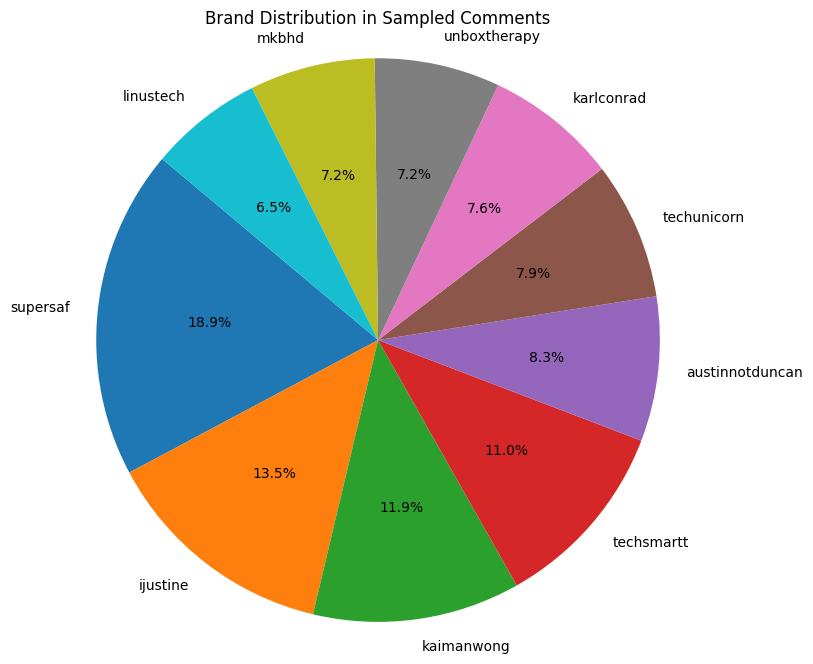

In [ ]:
import matplotlib.pyplot as plt

# Assuming sampled_df is your DataFrame containing the sampled comments

# Count the occurrences of each brand
brand_counts = sampled_df['Brand'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution in Sampled Comments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


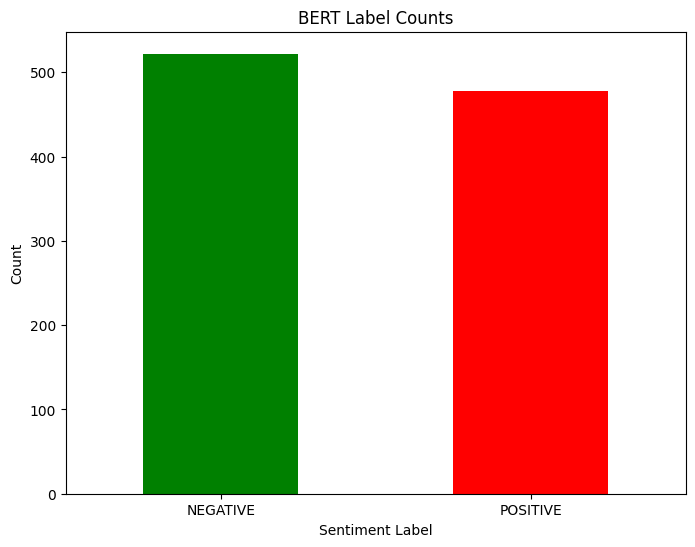

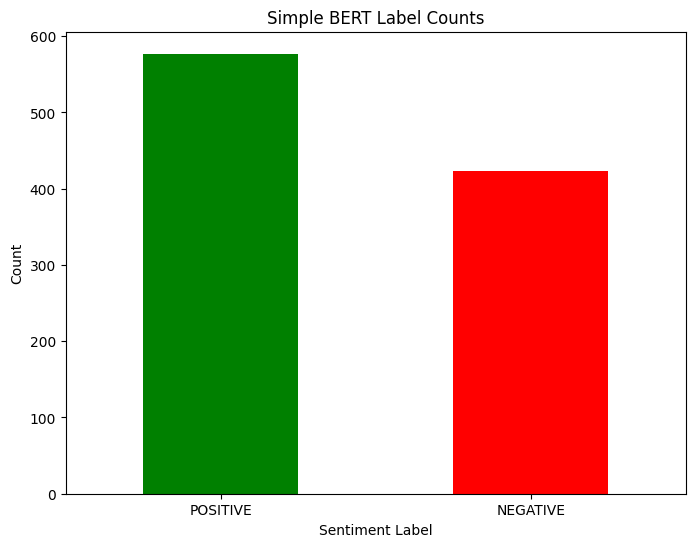

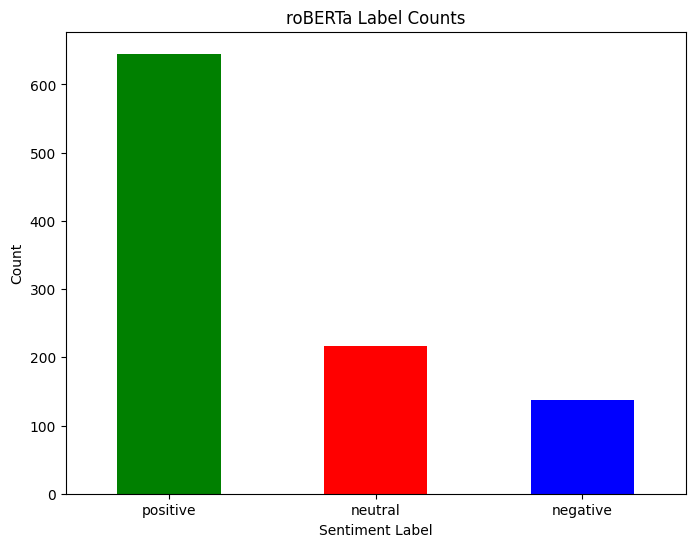

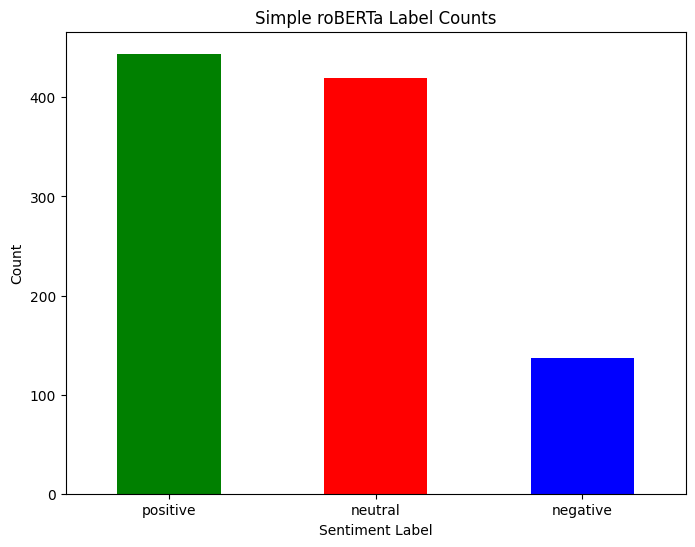

In [ ]:
# Get the value counts of BERT and roBERTa labels for both positive, neutral, and negative sentiments
bert_label_counts = sampled_df['Bert_Label'].value_counts()
simbert_label_counts = sampled_df['Simple_Bert_Label'].value_counts()
roberta_label_counts = sampled_df['roberta_Label'].value_counts()
simroberta_label_counts = sampled_df['Simple_roBerta_Label'].value_counts()

import matplotlib.pyplot as plt

# Define a function to plot the label counts
def plot_label_counts(label_counts, title):
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title(title)
    plt.xlabel('Sentiment Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Plot BERT label counts
plot_label_counts(bert_label_counts, 'BERT Label Counts')

# Plot Simple BERT label counts
plot_label_counts(simbert_label_counts, 'Simple BERT Label Counts')

# Plot roBERTa label counts
plot_label_counts(roberta_label_counts, 'roBERTa Label Counts')

# Plot Simple roBERTa label counts
plot_label_counts(simroberta_label_counts, 'Simple roBERTa Label Counts')



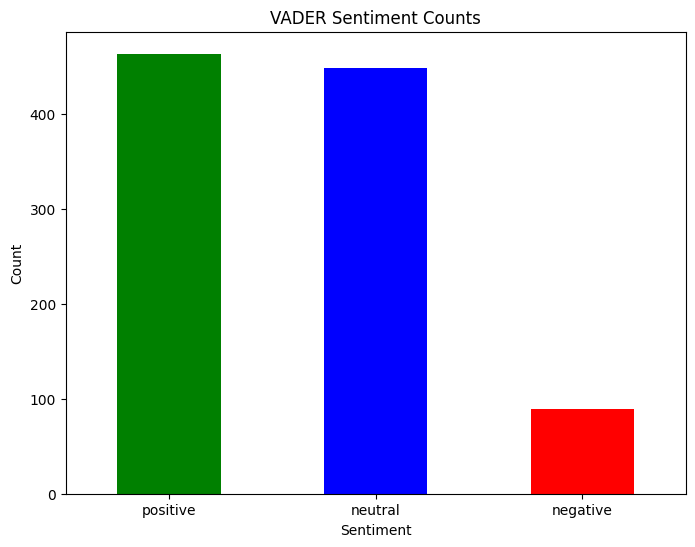

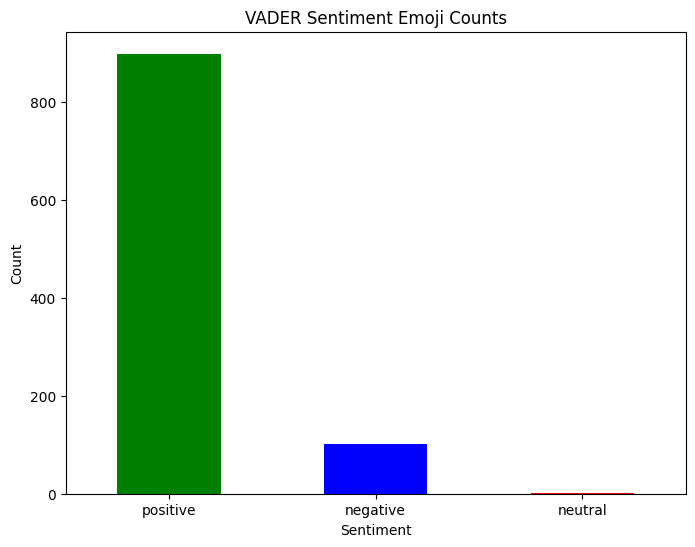

In [ ]:
import matplotlib.pyplot as plt

# Categorize VADER sentiment scores into positive, neutral, and negative
sampled_df['Vader_label'] = sampled_df['VADER_compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
sampled_df['Vader_label_emoji'] = sampled_df['VADER_Score_emoji'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

# Get the value counts of VADER sentiment categories
vader_sentiment_counts = sampled_df['Vader_label'].value_counts()
vader_sentiment_emoji_counts = sampled_df['Vader_label_emoji'].value_counts()

# Define a function to plot the VADER sentiment counts
def plot_vader_sentiment_counts(vader_counts, title):
    plt.figure(figsize=(8, 6))
    vader_counts.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Plot VADER sentiment counts
plot_vader_sentiment_counts(vader_sentiment_counts, 'VADER Sentiment Counts')
plot_vader_sentiment_counts(vader_sentiment_emoji_counts, 'VADER Sentiment Emoji Counts')


In [ ]:
sampled_df.head(5)

,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji,VADER_sentiment,VADER_sentiment_emoji,Vader_label,Vader_label_emoji
0,5306,yo is that linus tech tips 😱😱😱,austinnotduncan,YO IS THAT LINUS TECH TIPS,3,yo is that linus tech tips,NEGATIVE,-0.983348,NEGATIVE,-0.899044,neutral,0.455475,neutral,0.813273,0.0000,0.570,neutral,positive,neutral,positive
1,7295,😂😂 spider man,techsmartt,spider man,2,spider man,POSITIVE,0.901041,POSITIVE,0.995064,neutral,0.572710,positive,0.495978,0.0000,0.442,neutral,positive,neutral,positive
2,8,wowww 🔥,mkbhd,Wowww,1,wowww,POSITIVE,0.985905,POSITIVE,0.997270,positive,0.961197,positive,0.602939,0.0000,0.139,neutral,positive,neutral,positive
3,6230,a team 🔥 all we need is you wondering around h...,kaimanwong,A team all we need is you wondering around HK...,1,a team all we need is you wondering around hk...,NEGATIVE,-0.972002,POSITIVE,0.950903,neutral,0.598635,negative,-0.600636,0.0000,0.139,neutral,positive,neutral,positive
4,9040,thank you for the update mate 👊👊,techunicorn,thank you for the update mate,2,thank you for the update mate,POSITIVE,0.999485,POSITIVE,0.999811,positive,0.974214,positive,0.950505,0.3612,1.642,positive,positive,positive,positive


In [ ]:
# Convert VADER scores to sentiment labels
def vader_to_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Count the number of rows with different labels for each comparison
diff_labels_vader_bert = (sampled_df['Vader_label_emoji'] != sampled_df['Bert_Label']).sum()
diff_labels_vader_roberta = (sampled_df['Vader_label_emoji'] != sampled_df['roberta_Label']).sum()
diff_labels_bert_roberta = (sampled_df['Bert_Label'] != sampled_df['roberta_Label']).sum()
diff_labels_vader_simple_bert = (sampled_df['Vader_label'] != sampled_df['Simple_Bert_Label']).sum()
diff_labels_vader_simple_roberta = (sampled_df['Vader_label'] != sampled_df['Simple_roBerta_Label']).sum()
diff_labels_simple_bert_roberta = (sampled_df['Simple_Bert_Label'] != sampled_df['Simple_roBerta_Label']).sum()

# Display the counts
print("VADER_sentiment_emoji vs Bert_Label:", diff_labels_vader_bert)
print("VADER_sentiment_emoji vs roberta_Label:", diff_labels_vader_roberta)
print("Bert_Label vs roberta_Label:", diff_labels_bert_roberta)
print("VADER_sentiment vs Simple_Bert_Label:", diff_labels_vader_simple_bert)
print("VADER_sentiment vs Simple_roBerta_Label:", diff_labels_vader_simple_roberta)
print("Simple_Bert_Label vs Simple_roBerta_Label:", diff_labels_simple_bert_roberta)


VADER_sentiment_emoji vs Bert_Label: 1000
VADER_sentiment_emoji vs roberta_Label: 316
Bert_Label vs roberta_Label: 1000
VADER_sentiment vs Simple_Bert_Label: 1000
VADER_sentiment vs Simple_roBerta_Label: 291
Simple_Bert_Label vs Simple_roBerta_Label: 1000


In [ ]:
#sampled_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Questionnaire/Sampled QUestionnaire Comments.csv", index=False)

##Normalize VADER scores of questionnaire

In [ ]:
import pandas as pd
sampled_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Questionnaire/Sampled QUestionnaire Comments.csv")
sampled_df.head()

,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji,VADER_sentiment,VADER_sentiment_emoji
0,5306,yo is that linus tech tips 😱😱😱,austinnotduncan,YO IS THAT LINUS TECH TIPS,3,yo is that linus tech tips,NEGATIVE,-0.983348,NEGATIVE,-0.899044,neutral,0.455475,neutral,0.813273,0.0000,0.570,neutral,positive
1,7295,😂😂 spider man,techsmartt,spider man,2,spider man,POSITIVE,0.901041,POSITIVE,0.995064,neutral,0.572710,positive,0.495978,0.0000,0.442,neutral,positive
2,8,wowww 🔥,mkbhd,Wowww,1,wowww,POSITIVE,0.985905,POSITIVE,0.997270,positive,0.961197,positive,0.602939,0.0000,0.139,neutral,positive
3,6230,a team 🔥 all we need is you wondering around h...,kaimanwong,A team all we need is you wondering around HK...,1,a team all we need is you wondering around hk...,NEGATIVE,-0.972002,POSITIVE,0.950903,neutral,0.598635,negative,-0.600636,0.0000,0.139,neutral,positive
4,9040,thank you for the update mate 👊👊,techunicorn,thank you for the update mate,2,thank you for the update mate,POSITIVE,0.999485,POSITIVE,0.999811,positive,0.974214,positive,0.950505,0.3612,1.642,positive,positive


In [ ]:
# Define custom normalization function
def custom_normalize(value):
    if value == 0:
        return 0  # No change for 0 values
    elif value > 0:
        return value / sampled_df['VADER_Score_emoji'].abs().max()  # Scale positive values between 0 and 1
    else:
        return value / abs(sampled_df['VADER_Score_emoji'].min())  # Scale negative values between -1 and 0

# Apply custom normalization function to 'VADER_Score_emoji' column in sampled_df
sampled_df['VADER_Score_emoji'] = sampled_df['VADER_Score_emoji'].apply(custom_normalize)

# Print the first few rows to verify the changes
sampled_df.head()

,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji,VADER_sentiment,VADER_sentiment_emoji
0,5306,yo is that linus tech tips 😱😱😱,austinnotduncan,YO IS THAT LINUS TECH TIPS,3,yo is that linus tech tips,NEGATIVE,-0.983348,NEGATIVE,-0.899044,neutral,0.455475,neutral,0.813273,0.0000,0.014408,neutral,positive
1,7295,😂😂 spider man,techsmartt,spider man,2,spider man,POSITIVE,0.901041,POSITIVE,0.995064,neutral,0.572710,positive,0.495978,0.0000,0.011173,neutral,positive
2,8,wowww 🔥,mkbhd,Wowww,1,wowww,POSITIVE,0.985905,POSITIVE,0.997270,positive,0.961197,positive,0.602939,0.0000,0.003514,neutral,positive
3,6230,a team 🔥 all we need is you wondering around h...,kaimanwong,A team all we need is you wondering around HK...,1,a team all we need is you wondering around hk...,NEGATIVE,-0.972002,POSITIVE,0.950903,neutral,0.598635,negative,-0.600636,0.0000,0.003514,neutral,positive
4,9040,thank you for the update mate 👊👊,techunicorn,thank you for the update mate,2,thank you for the update mate,POSITIVE,0.999485,POSITIVE,0.999811,positive,0.974214,positive,0.950505,0.3612,0.041507,positive,positive


In [ ]:
#sampled_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Questionnaire/Sampled_QUestionnaire_Comments.csv", index=False)

## Questionnaire visalizations

In [ ]:
sampled_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Questionnaire/Sampled_QUestionnaire_Comments.csv")

In [ ]:
sampled_df.head()

,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,roberta_Label,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji,VADER_sentiment,VADER_sentiment_emoji
0,5306,yo is that linus tech tips 😱😱😱,austinnotduncan,YO IS THAT LINUS TECH TIPS,3,yo is that linus tech tips,NEGATIVE,-0.983348,NEGATIVE,-0.899044,neutral,0.455475,neutral,0.813273,0.0000,0.014408,neutral,positive
1,7295,😂😂 spider man,techsmartt,spider man,2,spider man,POSITIVE,0.901041,POSITIVE,0.995064,neutral,0.572710,positive,0.495978,0.0000,0.011173,neutral,positive
2,8,wowww 🔥,mkbhd,Wowww,1,wowww,POSITIVE,0.985905,POSITIVE,0.997270,positive,0.961197,positive,0.602939,0.0000,0.003514,neutral,positive
3,6230,a team 🔥 all we need is you wondering around h...,kaimanwong,A team all we need is you wondering around HK...,1,a team all we need is you wondering around hk...,NEGATIVE,-0.972002,POSITIVE,0.950903,neutral,0.598635,negative,-0.600636,0.0000,0.003514,neutral,positive
4,9040,thank you for the update mate 👊👊,techunicorn,thank you for the update mate,2,thank you for the update mate,POSITIVE,0.999485,POSITIVE,0.999811,positive,0.974214,positive,0.950505,0.3612,0.041507,positive,positive


### Brands

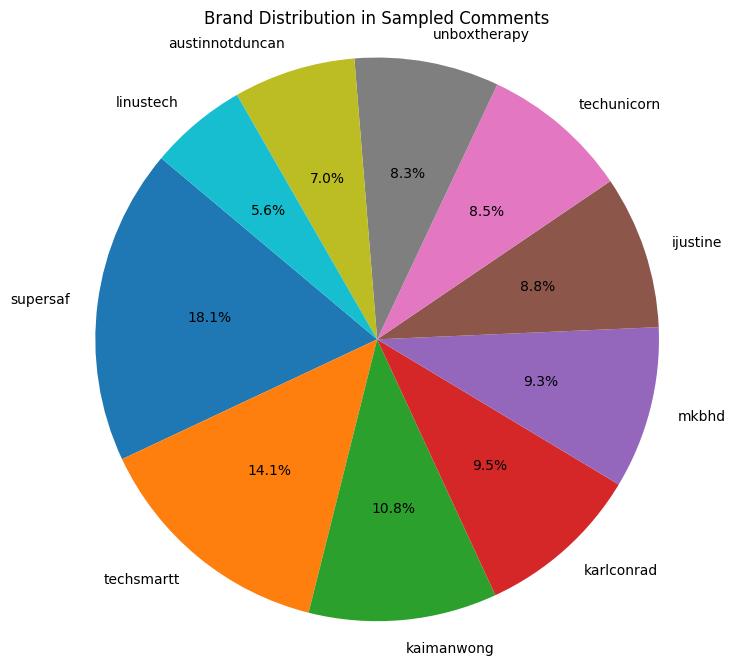

In [ ]:
import matplotlib.pyplot as plt

# Assuming sampled_df is your DataFrame containing the sampled comments

# Count the occurrences of each brand
brand_counts = sampled_df['Brand'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution in Sampled Comments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### VADER BERT RoB labels (emoji)

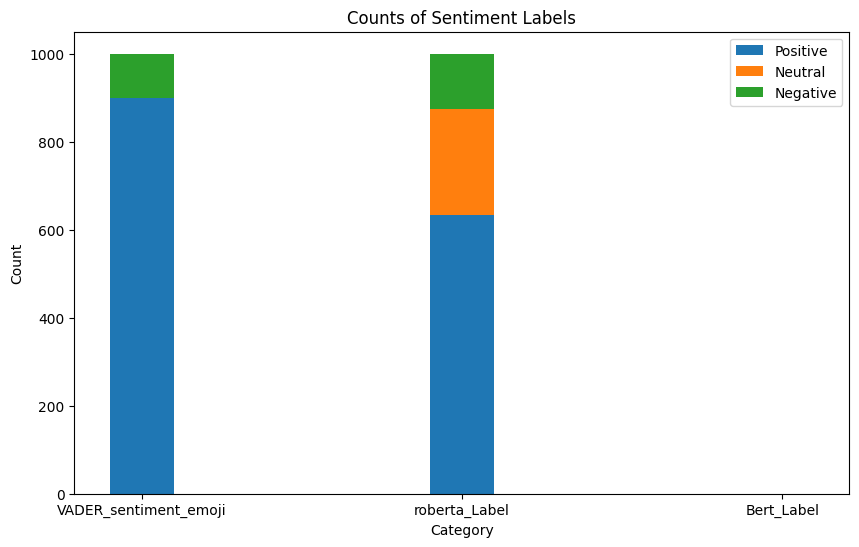

In [ ]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['VADER_sentiment_emoji', 'roberta_Label', 'Bert_Label']

# Initialize counters for positive, negative, and neutral labels
positive_counts = []
negative_counts = []
neutral_counts = []

# Iterate over each column and count the occurrences of positive, negative, and neutral labels
for column in columns_of_interest:
    positive_counts.append((sampled_df[column] == 'positive').sum())
    negative_counts.append((sampled_df[column] == 'negative').sum())
    neutral_counts.append((sampled_df[column] == 'neutral').sum())

# Plot the counts
labels = ['VADER_sentiment_emoji', 'roberta_Label', 'Bert_Label']
x = range(len(labels))

plt.figure(figsize=(10, 6))

plt.bar(x, positive_counts, width=0.2, label='Positive', align='center')
plt.bar(x, neutral_counts, width=0.2, bottom=positive_counts, label='Neutral', align='center')
plt.bar(x, negative_counts, width=0.2, bottom=[positive_counts[i] + neutral_counts[i] for i in range(len(positive_counts))], label='Negative', align='center')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Sentiment Labels')
plt.xticks(x, labels)
plt.legend()

plt.show()


### VADER BERT rOB polarities (emojis)

### VADER BERT RoB labels (simple text)

### VADER BERT RoB labels (simple text)

##Questionnaire Results

In [ ]:
import pandas as pd
sampled_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Questionnaire/Sampled_QUestionnaire_Comments.csv")
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Questionnaire/Questionnaire Responses.csv")

In [ ]:
# Rename columns in df
df = df.rename(columns={'Polarity': 'Survey_Polarity', 'Score': 'Survey_Score'})
df

,Unnamed: 0,Comment,Response,Survey_Polarity,Survey_Score
0,1,1.1. yo is that linus tech tips 😱😱😱,"Positive,3 (high)",Positive,3.0
1,2,1.2. 😂😂 spider man,"Positive,2 (moderate)",Positive,2.0
2,3,1.3. wowww 🔥,"Positive,3 (high)",Positive,3.0
3,4,1.4. a team 🔥 all we need is you wondering aro...,"Positive,3 (high)",Positive,3.0
4,5,1.5. thank you for the update mate 👊👊,"Positive,2 (moderate)",Positive,2.0
...,...,...,...,...,...
995,996,1.96. Lol 😂 The fact that I got this means I n...,"Positive,2",Positive,2.0
996,997,1.97. Mine isn't buggy at all 👏👏👏,"Positive,2",Positive,2.0
997,998,1.98. iPhone 13 in Midnight or iPhone 13 Pro i...,"Positive,3",Positive,3.0
998,999,1.99. Everything I dreamt as a MacBook is ther...,"Positive,3",Positive,3.0


In [ ]:
# Create two new columns in sampled_df and assign values from df
sampled_df['Survey_Polarity'] = df['Survey_Polarity'].values
sampled_df['Survey_Score'] = df['Survey_Score'].values

# Multiply survey negative scoresa with -1
sampled_df.loc[sampled_df['Survey_Polarity'] == 'Negative', 'Survey_Score'] *= -1

# Display the updated sampled_df
sampled_df.head()

,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,...,roberta_Score,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji,VADER_sentiment,VADER_sentiment_emoji,Survey_Polarity,Survey_Score,Vader_Label
0,5306,yo is that linus tech tips 😱😱😱,austinnotduncan,YO IS THAT LINUS TECH TIPS,3,yo is that linus tech tips,Negative,-0.983348,NEGATIVE,-0.899044,...,0.455475,neutral,0.813273,0.0000,0.014408,neutral,positive,Positive,3.0,Positive
1,7295,😂😂 spider man,techsmartt,spider man,2,spider man,Positive,0.901041,POSITIVE,0.995064,...,0.572710,positive,0.495978,0.0000,0.011173,neutral,positive,Positive,2.0,Positive
2,8,wowww 🔥,mkbhd,Wowww,1,wowww,Positive,0.985905,POSITIVE,0.997270,...,0.961197,positive,0.602939,0.0000,0.003514,neutral,positive,Positive,3.0,Positive
3,6230,a team 🔥 all we need is you wondering around h...,kaimanwong,A team all we need is you wondering around HK...,1,a team all we need is you wondering around hk...,Negative,-0.972002,POSITIVE,0.950903,...,0.598635,negative,-0.600636,0.0000,0.003514,neutral,positive,Positive,3.0,Positive
4,9040,thank you for the update mate 👊👊,techunicorn,thank you for the update mate,2,thank you for the update mate,Positive,0.999485,POSITIVE,0.999811,...,0.974214,positive,0.950505,0.3612,0.041507,positive,positive,Positive,2.0,Positive


In [ ]:
#Normalizing the survey scores

# Define the minimum and maximum values of the original scale
min_original = -3
max_original = 3

# Define the minimum and maximum values of the desired scale
min_desired = -1
max_desired = 1

# Perform the linear transformation to normalize the scores
sampled_df['Normalized_Survey_Score'] = ((sampled_df['Survey_Score'] - min_original) / (max_original - min_original)) * (max_desired - min_desired) + min_desired

# Display the first few rows to verify the transformation
sampled_df[['Survey_Score', 'Normalized_Survey_Score']]


,Survey_Score,Normalized_Survey_Score
0,3.0,1.000000
1,2.0,0.666667
2,3.0,1.000000
3,3.0,1.000000
4,2.0,0.666667
...,...,...
995,2.0,0.666667
996,2.0,0.666667
997,3.0,1.000000
998,3.0,1.000000


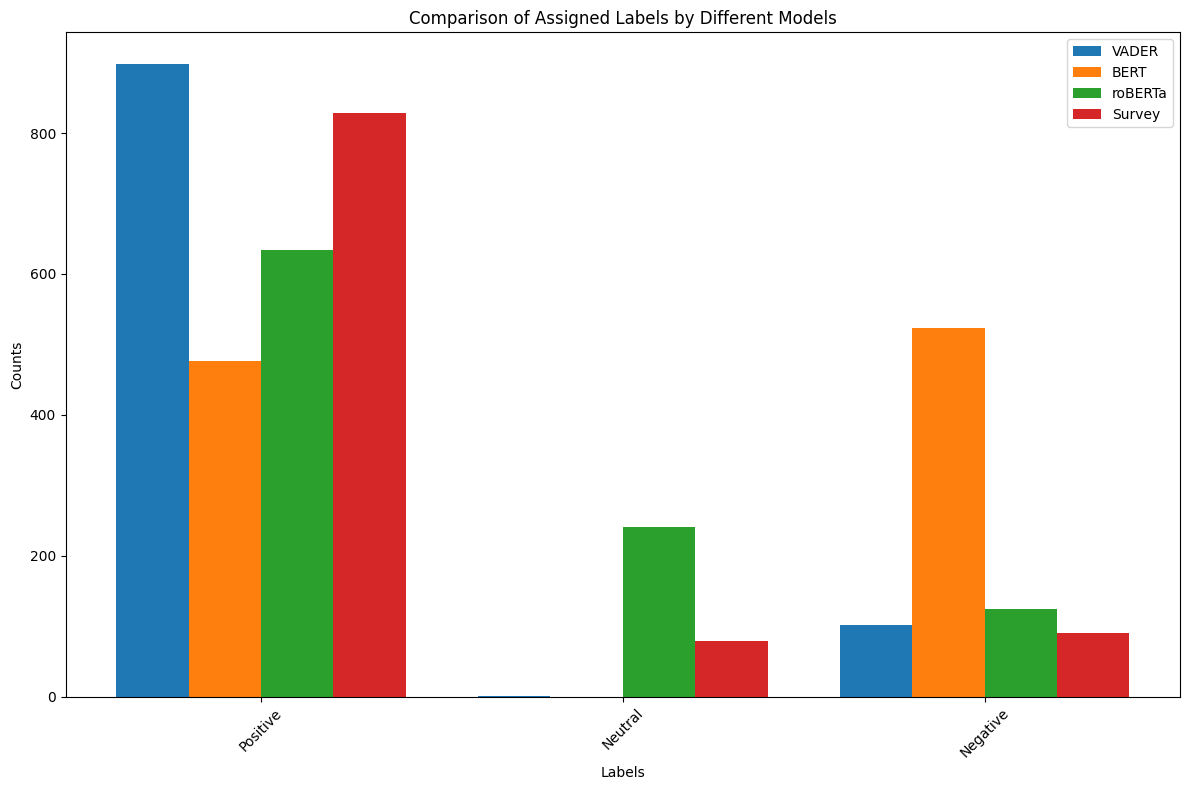

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define mapping for labels across models
bert_label_mapping = {
    'POSITIVE': 'Positive',
    'NEUTRAL': 'Neutral',
    'NEGATIVE': 'Negative'
}

vader_emoji_mapping = {
    'positive': 'Positive',
    'neutral': 'Neutral',
    'negative': 'Negative'
}

roberta_label_mapping = {
    'positive': 'Positive',
    'neutral': 'Neutral',
    'negative': 'Negative'
}

# Map labels for BERT and roBERTa models
sampled_df['Bert_Label'] = sampled_df['Bert_Label'].map(bert_label_mapping)
sampled_df['roberta_Label'] = sampled_df['roberta_Label'].map(roberta_label_mapping)
sampled_df['Vader_Label'] = sampled_df['VADER_sentiment_emoji'].map(vader_emoji_mapping)

# Count occurrences of labels in each column
vader_counts = sampled_df['Vader_Label'].value_counts()
bert_counts = sampled_df['Bert_Label'].value_counts()
roberta_counts = sampled_df['roberta_Label'].value_counts()
survey_counts = sampled_df['Survey_Polarity'].value_counts()

# Get unique labels for the x-axis
labels = ['Positive', 'Neutral', 'Negative']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot grouped bar chart
bar_width = 0.2
index = range(len(labels))
ax.bar(index, [vader_counts.get(label, 0) for label in labels], bar_width, label='VADER')
ax.bar([i + bar_width for i in index], [bert_counts.get(label, 0) for label in labels], bar_width, label='BERT')
ax.bar([i + 2 * bar_width for i in index], [roberta_counts.get(label, 0) for label in labels], bar_width, label='roBERTa')
ax.bar([i + 3 * bar_width for i in index], [survey_counts.get(label, 0) for label in labels], bar_width, label='Survey')

# Customize the plot
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Assigned Labels by Different Models')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Remove Neutral labels to look for BERTs performance
2. calculate errors MAD, RMSE, etc. of each model for each label, make confusion matrix,

In [ ]:
# Look for the term "neutral" in the column "Vader_sentiment_emoji"
neutral_rows = sampled_df[sampled_df['VADER_sentiment_emoji'] == 'neutral']

# Display rows where the term "neutral" is found in the column "Vader_sentiment_emoji"
neutral_rows


,Unnamed: 0,Comment,Brand,Simple_Text,Emoji_Count,Prep_Text,Bert_Label,Bert_Score,Simple_Bert_Label,Simple_Bert_Score,...,Simple_roBerta_Label,Simple_roBerta_Score,VADER_compound,VADER_Score_emoji,VADER_sentiment,VADER_sentiment_emoji,Survey_Polarity,Survey_Score,Vader_Label,Normalized_Survey_Score
544,7944,منو اومد حالم بهم خورد چیه این واقعا 🤷🏽‍♂️,techsmartt,منو اومد حالم بهم خورد چیه این واقعا,1,منو اومد حالم بهم خورد چیه این واقعا,Negative,-0.60397,NEGATIVE,-0.578641,...,neutral,0.772853,0.0,0.0,neutral,neutral,Neutral,NaN,Neutral,NaN


In order to compare the polarity of different models,i.e how extreme they assign sentiment to comments, i'll make a histogram to comapre polarity

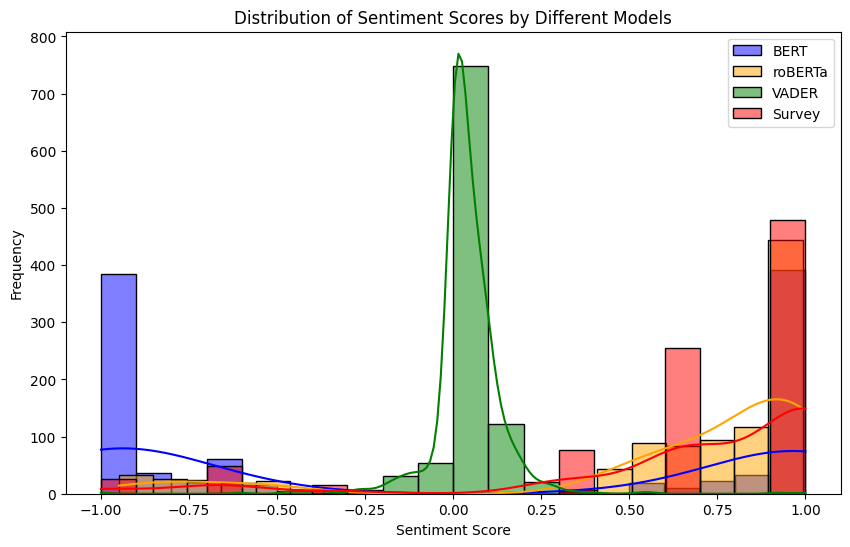

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns containing sentiment scores for each model
bert_scores = sampled_df['Bert_Score']
roberta_scores = sampled_df['roberta_Score']
vader_scores = sampled_df['VADER_Score_emoji']
survey_scores = sampled_df['Normalized_Survey_Score']

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram or density plot for BERT scores
sns.histplot(bert_scores, bins=20, kde=True, color='blue', label='BERT')

# Plot histogram or density plot for roBERTa scores
sns.histplot(roberta_scores, bins=20, kde=True, color='orange', label='roBERTa')

# Plot histogram or density plot for VADER scores
sns.histplot(vader_scores, bins=20, kde=True, color='green', label='VADER')

# Plot histogram or density plot for survey scores
sns.histplot(survey_scores, bins=20, kde=True, color='red', label='Survey')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores by Different Models')
plt.legend()

# Show plot
plt.show()


# Model wise analysis of comments

##Emoji comments comparison of VADER BERT and roBERTa models

## Simple Text Comparison of VADER BERT and roBERTa

# Influencerwise analysis of comments

## Emoji comments comparison of VADER BERT and roBERTa models

##Simple Text Comparison of VADER BERT and roBERTa